In [6]:
import numpy as np
from scipy import misc # for loading image
import imageio

np.random.seed(1)


#filename structure
path = 'YALE/unpadded/'
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses', 'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink']
prefix = 'subject'
surfix = '.pgm'

# data dimension
h, w, K = 116, 98, 100 # hight, weight, new dim
D = h * w
N = len(states) * 15

# collect all data
X = np.zeros((D, N))
cnt = 0
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = imageio.imread(fn).reshape(D)
        cnt += 1

print(X.shape)

(11368, 165)


In [5]:

# Doing PCA, note that each row is a data point

from sklearn.decomposition import PCA 

pca = PCA(n_components=K) # K = 100
pca.fit(X.T)

# projection matrix
U = pca.components_.T

print(U.shape)


(11368, 100)


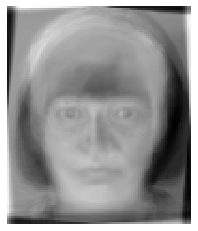

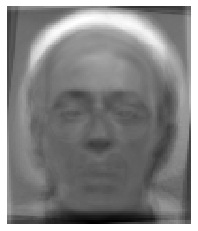

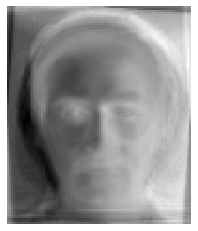

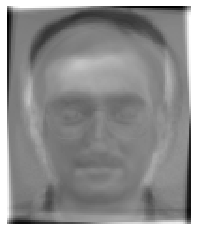

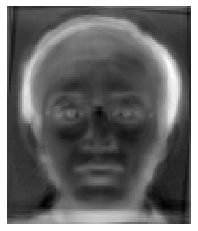

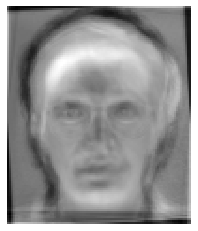

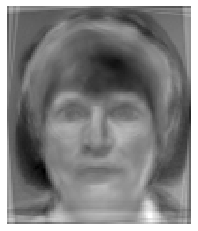

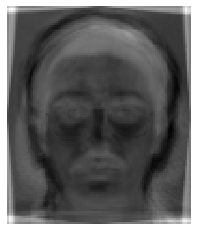

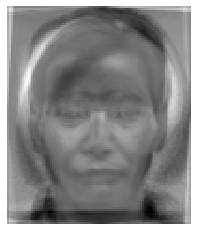

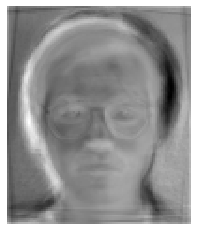

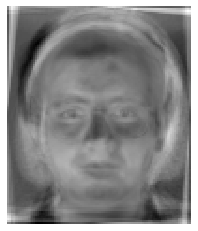

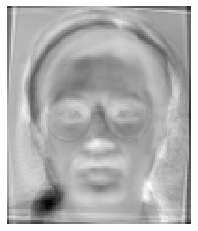

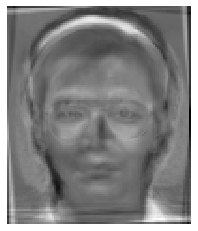

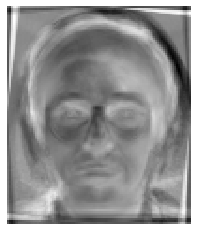

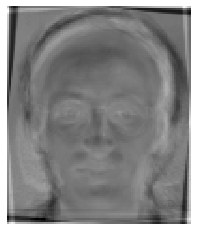

In [7]:
import matplotlib.pyplot as plt
for i in range(15):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(116, 98), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
#     f2 = plt.imshow(, interpolation='nearest' )
    plt.gray()
    fn = 'eigenface' + str(i).zfill(2) + '.png'
#     plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    plt.show()